Imports

In [3]:
import cv2
from google.colab import files
from io import BytesIO
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

Upload Image

In [4]:
uploaded = files.upload()

Saving chicken.jpg to chicken.jpg


**Guassian Filter**

In [ ]:
def GuassianFilter(img, sigma, T):
  #create filter
  sHalf = np.round(np.sqrt(-np.log(T) * 2 * sigma**2))
  N= 2*sHalf +1 #total mask size
  [Y, X] = np.meshgrid (np.arange(-sHalf, sHalf+1), np.arange(-sHalf, sHalf+1) ) 
  G = np.exp(-(X**2 + Y**2))/(2*sigma**2)
  #conolve img with filter
  result = np.zeros((img.shape[0] - 2, img.shape[1]-2)) #2 rows and 2 columns will be missed while placing kernel

  for k in range (img.shape[0] - 2): #vertical sliding, -2 because of padding
    for h in range (0, img.shape[1] - 2): #horizontal sliding, -2 because of passing
      ki = 0
      kj = 0
      for i  in range (k , k+3): # +3 as i am taking kernel of 3*3
        kj = 0;
        for j in range (h, h + 3):
          result[k][h] = result [k][h] + (img[i][j] * G[ki][kj]) 
          kj = kj + 1;
        ki = ki+1;  
  
  return result

**Box Filter**

In [ ]:
def BoxFilter (img):
  result = np.zeros((img.shape[0], img.shape[1]))
  for i in range (1 , img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
      result[i][j] = (img[i - 1][j + 1] +
              img[i + 0][j + 1] + 
              img[i + 1][j + 1] + 
              img[i - 1][j + 0] + 
              img[i + 0][j + 0] + 
              img[i + 1][j + 0] + 
              img[i - 1][j - 1] + 
              img[i + 0][j - 1] + 
              img[i + 1][j - 1])/9
  return result

**Prewitt / Sobel Detectore**


In [5]:
def detectEdge (img, filter):
  result = np.zeros((img.shape[0] - 2, img.shape[1]-2)) #2 rows and 2 columns will be missed while placing kernel
  for k in range (img.shape[0] - 2): #vertical sliding, -2 because of padding
    for h in range (0, img.shape[1] - 2): #horizontal sliding, -2 because of passing
      ki = 0
      kj = 0
      for i  in range (k , k+3): # +3 as i am taking kernel of 3*3
        kj = 0;
        for j in range (h, h + 3):
          result[k][h] = result [k][h] + (img[i][j] * filter[ki][kj]) 
          kj = kj + 1;
        ki = ki+1;  
  
  return result

**Read Image**

Guassian Filter Calling

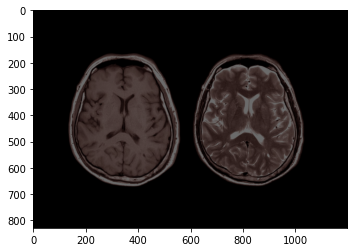

True

In [ ]:
img = cv2.imread('MRI2.jpg')
#split the channels
b,g,r=cv2.split(img)

# sigma can be 0.5, 1 , 1.5
sigma = 1.5
# T can be any value between 0 and 1
T = 0.5
result_b = GuassianFilter(b,sigma,T)
result_g = GuassianFilter(g,sigma,T)
result_r = GuassianFilter(r, sigma,T)
result = cv2.merge([result_b,result_g,result_r])

plt.imshow(result.astype('uint8'))
plt.show()
cv2.imwrite("MRI2_Gaussian_(1.5)_(0.5).jpg", result) 

Box Filter Calling

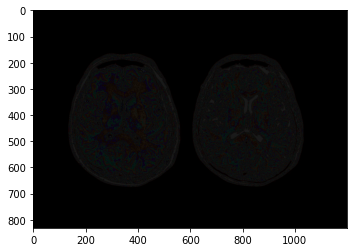

True

In [ ]:
img = cv2.imread('MRI2.jpg')
#split the channels
b,g,r=cv2.split(img)
result_b = BoxFilter(b)
result_g = BoxFilter(g)
result_r = BoxFilter(r)

result = cv2.merge([result_b,result_g,result_r])

plt.imshow(result.astype('uint8'))
plt.show()
cv2.imwrite("MRI2_Averaged.jpg", result) 

**Sobel/Prewitt calling**

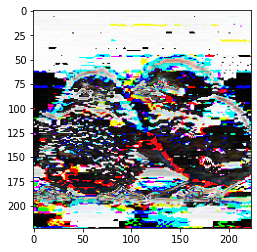

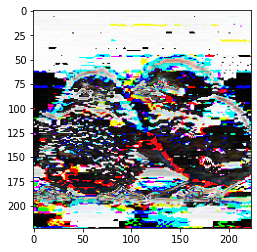

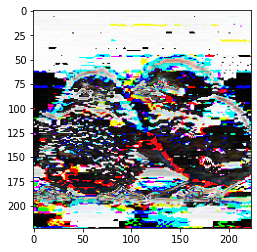

True

In [6]:
img = cv2.imread('chicken.jpg')
# sobel_filter = 
prewit_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
sobel_filter_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
#split the channels
b,g,r=cv2.split(img)
# ----------------------------------------------- prewitt
result_b = detectEdge(b,prewit_filter)
result_g = detectEdge(g,prewit_filter)
result_r = detectEdge(r,prewit_filter)

result = cv2.merge([result_b,result_g,result_r])

plt.imshow(result.astype('uint8'))
plt.show()
cv2.imwrite("chicken_Prewitt.jpg", result) 
# ------------------------------------------------ sobelx
sx_result_b = detectEdge(b,sobel_filter_x)
sx_result_g = detectEdge(g,sobel_filter_x)
sx_result_r = detectEdge(r,sobel_filter_x)

result_sx = cv2.merge([sx_result_b,sx_result_g,sx_result_r])

plt.imshow(result.astype('uint8'))
plt.show()
cv2.imwrite("chicken_Sobelx.jpg", result_sx) 
# ------------------------------------------------ sobely
sy_result_b = detectEdge(b,sobel_filter_y)
sy_result_g = detectEdge(g,sobel_filter_y)
sy_result_r = detectEdge(r,sobel_filter_y)

result_sy = cv2.merge([sy_result_b,sy_result_g,sy_result_r])

plt.imshow(result.astype('uint8'))
plt.show()
cv2.imwrite("chicken_Sobely.jpg", result_sy) 